# Nonlinear Classification
Under construction (3 Oct 2018)

In [606]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
dtype = torch.float
import NeuralNetwork as NN
import Layer
import importlib
import time
from copy import deepcopy
from IPython.display import display
from ipywidgets import FloatProgress

importlib.reload(NN)
importlib.reload(Layer);

In [607]:
def MakeBatches(data_in, data_out, batch_size=10):
    '''
    batches = MakeBatches(data_in, data_out, batch_size=10)
    
    Breaks up the dataset into batches of size batch_size.
    
    Inputs:
      data_in    is a list of inputs
      data_out   is a list of outputs
      batch_size is the number of samples in each batch
      
    Output:
      batches is a list containing batches, where each batch is:
                 [in_batch, out_batch]
    '''
    N = len(data_in)
    batches = []
    for k in range(0, N, batch_size):
        din = data_in[k:k+batch_size]
        dout = data_out[k:k+batch_size]
        if isinstance(din, (list, tuple)):
            batches.append( [torch.stack(din, dim=0).float().to(device) , torch.stack(dout, dim=0).float().to(device)] )
        else:
            batches.append( [din.float().to(device) , dout.float().to(device)] )
    return batches

In [608]:
if torch.cuda.is_available():
    device = torch.device("cuda:0") # Uncomment this to run on GPU
else:
    device = torch.device("cpu")

## Binary one-hot

In [507]:
# 8->5 binary one-hot
noise = 0.
n_samples = 100
s = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
e = np.eye(5)
s = s*2. - 1.
#e = e*2. - 1.
classes = len(s)
training_input = []
training_output = []
r = 0
for n in range(n_samples):
    training_input.append(np.array(s[r], dtype=float) + noise*np.random.normal(scale=0.01,size=len(s[r])))
    training_output.append(np.array(e[r], dtype=float))
    r = np.mod(r+1, classes) #r = np.random.randint(classes)

training_input = torch.tensor(training_input).float().to(device)
training_output = torch.tensor(training_output).float().to(device)
train = [training_input, training_output]

n_test_samples = 100
test_input = []
test_output = []
r = 0
for n in range(n_test_samples):
    test_input.append(np.array(s[r], dtype=float) + noise*np.random.normal(scale=0.01,size=len(s[r])))
    test_output.append(np.array(e[r], dtype=float))
    r = np.mod(r+1, classes) #np.random.randint(classes)

test_input = torch.tensor(test_input).float().to(device)
test_output = torch.tensor(test_output).float().to(device)
test = [test_input, test_output]

for x, t in zip(s,e):
    print(str(np.array(x,dtype=int))+' -> '+str(t))

[ 1 -1  1 -1 -1  1  1 -1] -> [1. 0. 0. 0. 0.]
[-1  1 -1  1 -1  1 -1  1] -> [0. 1. 0. 0. 0.]
[-1  1  1 -1  1 -1 -1  1] -> [0. 0. 1. 0. 0.]
[ 1 -1 -1 -1  1 -1  1  1] -> [0. 0. 0. 1. 0.]
[ 1 -1 -1  1 -1  1 -1  1] -> [0. 0. 0. 0. 1.]


In [531]:
importlib.reload(Layer)
importlib.reload(NN)

<module 'NeuralNetwork' from '/Users/jorchard/Dropbox/research/peBogacz/python/NeuralNetwork.py'>

In [508]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=8))
net.AddLayer(Layer.PELayer(n=7))
net.Connect(0, 1)
net.AddLayer(Layer.PELayer(n=6))
net.Connect(1,2)
net.AddLayer(Layer.TopPELayer(n=5))
net.Connect(2,3)

## Binary Mapping

In [532]:
# 8->4 binary mapping
noise = 0.
n_samples = 100
s = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
e = np.array([[0,1,1,1],[1,1,0,1],[1,0,1,1],[1,1,1,0],[0,0,0,0]])
s = s*2. - 1.
e = e*2. - 1.
classes = len(s)
training_input = []
training_output = []
r = 0
for n in range(n_samples):
    r = np.mod(r+1, classes) #r = np.random.randint(classes)
    training_input.append(np.array(s[r], dtype=float) + noise*np.random.normal(scale=0.01,size=len(s[r])))
    training_output.append(np.array(e[r], dtype=float))

training_input = torch.tensor(training_input).float().to(device)
training_output = torch.tensor(training_output).float().to(device)
train = [training_input, training_output]

n_test_samples = 100
test_input = []
test_output = []
r = 0
for n in range(n_test_samples):
    r = np.mod(r+1, classes) #np.random.randint(classes)
    test_input.append(np.array(s[r], dtype=float) + noise*np.random.normal(scale=0.01,size=len(s[r])))
    test_output.append(np.array(e[r], dtype=float))

test_input = torch.tensor(test_input).float().to(device)
test_output = torch.tensor(test_output).float().to(device)
test = [test_input, test_output]

for x, t in zip(s,e):
    print(str(np.array(x,dtype=int))+' -> '+str(t))

[ 1 -1  1 -1 -1  1  1 -1] -> [-1.  1.  1.  1.]
[-1  1 -1  1 -1  1 -1  1] -> [ 1.  1. -1.  1.]
[-1  1  1 -1  1 -1 -1  1] -> [ 1. -1.  1.  1.]
[ 1 -1 -1 -1  1 -1  1  1] -> [ 1.  1.  1. -1.]
[ 1 -1 -1  1 -1  1 -1  1] -> [-1. -1. -1. -1.]


In [548]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=8))
# net.AddLayer(Layer.PELayer(n=7))
# net.Connect(0, 1)
# net.AddLayer(Layer.PELayer(n=6))
# net.Connect(1,2)
# net.AddLayer(Layer.TopPELayer(n=4))
# net.Connect(2,3)
# net.ConnectNextLayer(Layer.InputPELayer(n=8))
net.ConnectNextLayer(Layer.PELayer(n=7))
net.ConnectNextLayer(Layer.PELayer(n=6))
net.ConnectNextLayer(Layer.TopPELayer(n=4))
net.layers[-1].sigma = Layer.tanh
net.layers[-1].sigma_p = Layer.tanh_p

In [549]:
net.layers[-1].sigma

<function Layer.tanh>

## Polar Clusters

In [612]:
n_theta = 4
n_rho = 3
s = []
e = []
#for theta in np.linspace(2.*np.pi/(n_theta+2.), 2.*np.pi*(n_theta+1.)/(n_theta+2.), n_theta, endpoint=True):
for theta in np.linspace(-1., 1, n_theta+1, endpoint=False):
    if theta != -1.:
        theta_radians = theta*np.pi
        for rho in np.linspace(0., 1., n_rho+1, endpoint=False):
            if rho != 0.:
                rho2 = rho - 0.5
                e.append([rho2, theta])
                x = rho*np.cos(theta_radians)
                y = rho*np.sin(theta_radians)
                s.append([x,y])
e = np.array(e)
s = np.array(s)
print(e)
print(s)

[[-0.25 -0.6 ]
 [ 0.   -0.6 ]
 [ 0.25 -0.6 ]
 [-0.25 -0.2 ]
 [ 0.   -0.2 ]
 [ 0.25 -0.2 ]
 [-0.25  0.2 ]
 [ 0.    0.2 ]
 [ 0.25  0.2 ]
 [-0.25  0.6 ]
 [ 0.    0.6 ]
 [ 0.25  0.6 ]]
[[-0.07725425 -0.23776413]
 [-0.1545085  -0.47552826]
 [-0.23176275 -0.71329239]
 [ 0.20225425 -0.14694631]
 [ 0.4045085  -0.29389263]
 [ 0.60676275 -0.44083894]
 [ 0.20225425  0.14694631]
 [ 0.4045085   0.29389263]
 [ 0.60676275  0.44083894]
 [-0.07725425  0.23776413]
 [-0.1545085   0.47552826]
 [-0.23176275  0.71329239]]


In [610]:
training_samples = 100
r = 0
training_input = []
training_output = []
for n in range(training_samples):
    r = np.mod(r+1, len(s)) #r = np.random.randint(classes)
    training_input.append(np.array(s[r,:], dtype=float) )#+ noise*np.random.normal(scale=0.01,size=len(s[r,:])))
    training_output.append(np.array(e[r,:], dtype=float))

training_input = torch.tensor(training_input).float().to(device)
training_output = torch.tensor(training_output).float().to(device)
train = [training_input, training_output]

n_test_samples = 100
test_input = []
test_output = []
r = 0
for n in range(n_test_samples):
    r = np.mod(r+1, len(s)) #r = np.random.randint(classes)
    test_input.append(np.array(s[r,:], dtype=float) )#+ noise*np.random.normal(scale=0.01,size=len(s[r,:])))
    test_output.append(np.array(e[r,:], dtype=float))

test_input = torch.tensor(test_input).float().to(device)
test_output = torch.tensor(test_output).float().to(device)
test = [test_input, test_output]

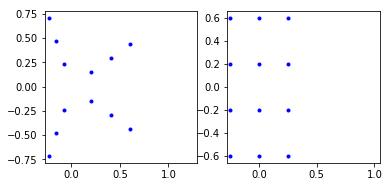

In [613]:
plt.subplot(1,2,1); plt.plot(s[:,0], s[:,1], 'b.'); plt.axis('square');
plt.subplot(1,2,2); plt.plot(e[:,0], e[:,1], 'b.'); plt.axis('square');

In [571]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=2)) # 0
net.AddLayer(Layer.PELayer(n=6))      # 1
net.AddLayer(Layer.PELayer(n=8))      # 2
net.AddLayer(Layer.TopPELayer(n=10))  # 3 (augmented)
net.AddLayer(Layer.TopPELayer(n=2))   # 4
net.Connect(0,1)
net.Connect(1,2)
net.Connect(2,3)
net.Connect(2,4)
net.layers[3].sigma = Layer.tanh
net.layers[3].sigma_p = Layer.tanh_p
net.layers[3].SetFF()  # Augmenting layers have no upper input
net.layers[4].sigma = Layer.tanh
net.layers[4].sigma_p = Layer.tanh_p

In [626]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=2)) # 0
net.AddLayer(Layer.PELayer(n=50))     # 1
net.AddLayer(Layer.PELayer(n=50))     # 2
net.AddLayer(Layer.TopPELayer(n=2))   # 3
net.Connect(0,1)
net.Connect(1,2)
net.Connect(2,3)
net.layers[3].sigma = Layer.tanh
net.layers[3].sigma_p = Layer.tanh_p

## Train

In [627]:
train_shuffle = list(zip(train[0],train[1]))
net.learning_tau = 100.
batch_size = 10
epochs = 40
fp = FloatProgress(min=0,max=epochs*len(train_shuffle))
display(fp)
T = 3
start_time = time.time()
for k in range(epochs):
    np.random.shuffle(train_shuffle)
    unzip = list(zip(*train_shuffle))
    batches = MakeBatches(unzip[0], unzip[1], batch_size)
    for x in batches:
        net.Reset()
        net.Infer(T, x[0], x[1])
        fp.value += batch_size
end_time = time.time()
print('Total time: '+str(end_time-start_time))

A Jupyter Widget

Total time: 43.10140609741211


In [591]:
#net.Save('blah.npy')

## Test

### Run the model on the test dataset

In [628]:
net.Reset()
yy = net.Predict(10., train[0])
y_true = train[1]

In [629]:
print(np.round(yy[:10],decimals=3))
print(y_true[:10])

tensor([[-0.9530, -0.8860],
        [-0.9580, -0.8740],
        [ 0.3320, -0.8610],
        [ 0.9540, -0.9010],
        [ 0.9800, -0.8660],
        [ 0.9750,  0.6930],
        [ 0.9830,  0.9060],
        [ 0.9860,  0.8160],
        [ 0.7240,  0.8950],
        [-0.8000,  0.8230]])
tensor([[ 0.0000, -0.6000],
        [ 0.2500, -0.6000],
        [-0.2500, -0.2000],
        [ 0.0000, -0.2000],
        [ 0.2500, -0.2000],
        [-0.2500,  0.2000],
        [ 0.0000,  0.2000],
        [ 0.2500,  0.2000],
        [-0.2500,  0.6000],
        [ 0.0000,  0.6000]])


In [618]:
net.Reset()
yy = net.Generate(10., test[1])
y_true = test[0]

In [271]:
# Test for binary strings dataset
fail = 0
for x,t in zip(yy, y_true):
    if np.isnan(t).any() or torch.min(x*t).le(0.):
        fail += 1
n_trials = float(len(y_true))
print('Accuracy '+str((n_trials-fail)/n_trials*100.)+'%')

Accuracy 0.0%


In [273]:
# Test for polar clusters dataset
fail = 0
for x,t in zip(yy, y_true):
    if np.isnan(t).any() or torch.max(abs(x-t)).ge(0.2):
        fail += 1
n_trials = float(len(test[0]))
print('Accuracy '+str((n_trials-fail)/n_trials))

Accuracy 1.0


In [58]:
idx = np.random.randint(len(test[0]))
net.Reset()
print(net.Predict(5., test[0][idx]))
print(test[1][idx])

tensor([ 0.1699,  0.1597,  0.1946,  0.3365,  0.1393])
tensor([ 0.,  1.,  0.,  0.,  0.])


In [56]:
net2 = NN.NeuralNetwork()
net2.Load('blah.npy')

In [406]:
np.shape(net2.W[1])

torch.Size([6, 7])

In [59]:
net2.Reset()
print(net2.Predict(5., test[0][idx]))
print(test[1][idx])

tensor([nan., nan., nan., nan., nan.])
tensor([ 0.,  1.,  0.,  0.,  0.])


In [250]:
print(np.shape(net2.layers[1].dvdt))
print(np.shape(net2.W[0]))
print(np.shape(net2.layers[0].e))
print(np.shape(net2.M[0]))
print(np.shape(net2.layers[1].v))

torch.Size([7])
torch.Size([7, 8])
torch.Size([8])
torch.Size([8, 7])
torch.Size([7])


In [251]:
print(np.shape(net.layers[1].dvdt))
print(np.shape(net.W[0]))
print(np.shape(net.layers[0].e))
print(np.shape(net.M[0]))
print(np.shape(net.layers[1].v))

torch.Size([7])
torch.Size([7, 8])
torch.Size([8])
torch.Size([8, 7])
torch.Size([7])


In [664]:
idx = np.random.randint(len(test[1]))
xx = net.Generate(10., test[1][idx])
print(xx)
print(test[0][idx])

tensor([ 0.5916, -0.5986, -0.8456, -0.7550,  0.8802, -0.8882,  0.5235,
         1.1115])
tensor([ 1., -1., -1., -1.,  1., -1.,  1.,  1.])


In [663]:
idx = 2
print(np.round(x_true[idx:idx+5],0)-np.round(x_est[idx:idx+5],0))

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


In [39]:
idx = 58
print(train[1][idx])
net.Predict(10., train[0][idx])

[-1. -1. -1. -1.]


tensor([ 0.9986,  0.9992, -0.9991,  0.9972], device='cuda:0')